# ESPnet2-ASR realtime demonstration

This notebook provides a demonstration of the realtime E2E-ASR using ESPnet2-ASR.

- ESPnet2-ASR: https://github.com/espnet/espnet/tree/master/egs2/TEMPLATE/asr1

Author: Jiatong Shi ([@ftshijt](https://github.com/ftshijt))

In [1]:
# NOTE: pip shows imcompatible errors due to preinstalled libraries but you do not need to care
!pip install -q espnet==0.10.0
!pip install -q espnet_model_zoo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 787.9/787.9 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.2/37.2 MB 22.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.6/73.6 kB 9.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 84.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 495.9/495.9 kB 41.0 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a pr

## ASR model demo

### Model Selection

Please select model shown in [espnet_model_zoo](https://github.com/espnet/espnet_model_zoo/blob/master/espnet_model_zoo/table.csv)

In this demonstration, we will show English, Japanese, Spanish, Mandrain, Multilingual ASR model, respectively

In [2]:
#@title Choose English ASR model { run: "auto" }

lang = 'en'
fs = 16000 #@param {type:"integer"}
tag = 'Shinji Watanabe/spgispeech_asr_train_asr_conformer6_n_fft512_hop_length256_raw_en_unnorm_bpe5000_valid.acc.ave' #@param ["Shinji Watanabe/spgispeech_asr_train_asr_conformer6_n_fft512_hop_length256_raw_en_unnorm_bpe5000_valid.acc.ave", "kamo-naoyuki/librispeech_asr_train_asr_conformer6_n_fft512_hop_length256_raw_en_bpe5000_scheduler_confwarmup_steps40000_optim_conflr0.0025_sp_valid.acc.ave"] {type:"string"}

In [ ]:
#@title Choose Japanese ASR model { run: "auto" }

lang = 'ja'
fs = 16000 #@param {type:"integer"}
tag = 'Shinji Watanabe/laborotv_asr_train_asr_conformer2_latest33_raw_char_sp_valid.acc.ave' #@param ["Shinji Watanabe/laborotv_asr_train_asr_conformer2_latest33_raw_char_sp_valid.acc.ave"] {type:"string"}

In [ ]:
#@title Choose Spanish ASR model { run: "auto" }

lang = 'es'
fs = 16000 #@param {type:"integer"}
tag = 'ftshijt/mls_asr_transformer_valid.acc.best' #@param ["ftshijt/mls_asr_transformer_valid.acc.best"] {type:"string"}

In [ ]:
#@title Choose Mandrain ASR model { run: "auto" }

lang = 'zh'
fs = 16000 #@param {type:"integer"}
tag = 'Emiru Tsunoo/aishell_asr_train_asr_streaming_transformer_raw_zh_char_sp_valid.acc.ave' #@param ["	Emiru Tsunoo/aishell_asr_train_asr_streaming_transformer_raw_zh_char_sp_valid.acc.ave"] {type:"string"}

In [ ]:
#@title Choose Multilingual ASR model { run: "auto" }

lang = 'multilingual'
fs = 16000 #@param {type:"integer"}
tag = 'ftshijt/open_li52_asr_train_asr_raw_bpe7000_valid.acc.ave_10best' #@param ["	ftshijt/open_li52_asr_train_asr_raw_bpe7000_valid.acc.ave_10best"] {type:"string"}

### Model Setup

In [3]:
import time
import torch
import string
from espnet_model_zoo.downloader import ModelDownloader
from espnet2.bin.asr_inference import Speech2Text


d = ModelDownloader()
# It may takes a while to download and build models
speech2text = Speech2Text(
    **d.download_and_unpack(tag),
    device="cuda",
    minlenratio=0.0,
    maxlenratio=0.0,
    ctc_weight=0.3,
    beam_size=10,
    batch_size=0,
    nbest=1
)

def text_normalizer(text):
    text = text.upper()
    return text.translate(str.maketrans('', '', string.punctuation))

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package cmudict to /root/nltk_data...
[nltk_data]   Unzipping corpora/cmudict.zip.
https://zenodo.org/record/4585558/files/asr_train_asr_conformer6_n_fft512_hop_length256_raw_en_unnorm_bpe5000_valid.acc.ave.zip?download=1: 100%|██████████| 772M/772M [00:11<00:00, 70.6MB/s]
/usr/local/lib/python3.10/dist-packages/espnet_model_zoo/downloader.py:364: UserWarning: Not validating checksum
  warnings.warn("Not validating checksum")


### Recognize our example recordings

fatal: destination path 'ESPNet_asr_egs' already exists and is not an empty directory.
Input Speech: ESPNet_asr_egs/en/1.wav


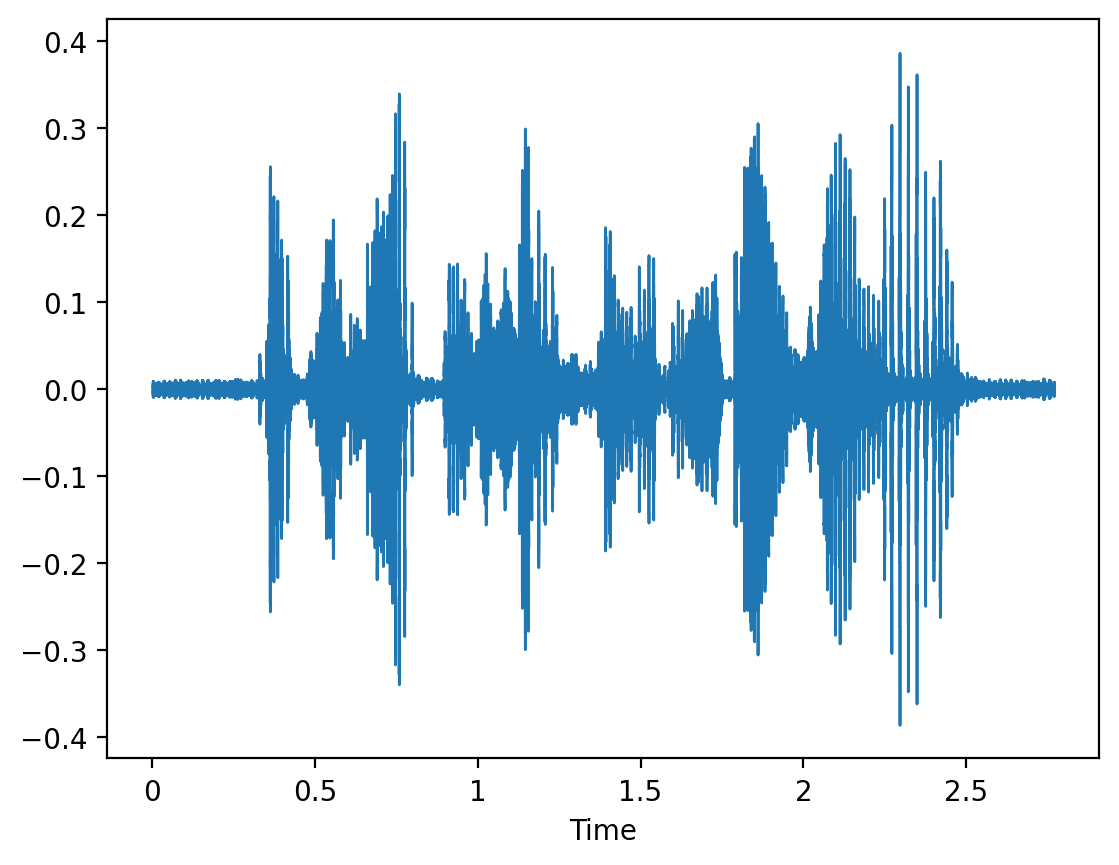

Reference text: IT WILL NOT BE SAFE FOR YOU TO STAY HERE NOW
ASR hypothesis: IT WILL NOT BE SAFE FOR YOU TO STAY HERE NOW
**************************************************


/usr/local/lib/python3.10/dist-packages/espnet/nets/ctc_prefix_score.py:323: RuntimeWarning: invalid value encountered in logaddexp
  r_sum = self.xp.logaddexp(


Input Speech: ESPNet_asr_egs/en/2.wav


/usr/local/lib/python3.10/dist-packages/espnet/nets/ctc_prefix_score.py:323: RuntimeWarning: invalid value encountered in logaddexp
  r_sum = self.xp.logaddexp(


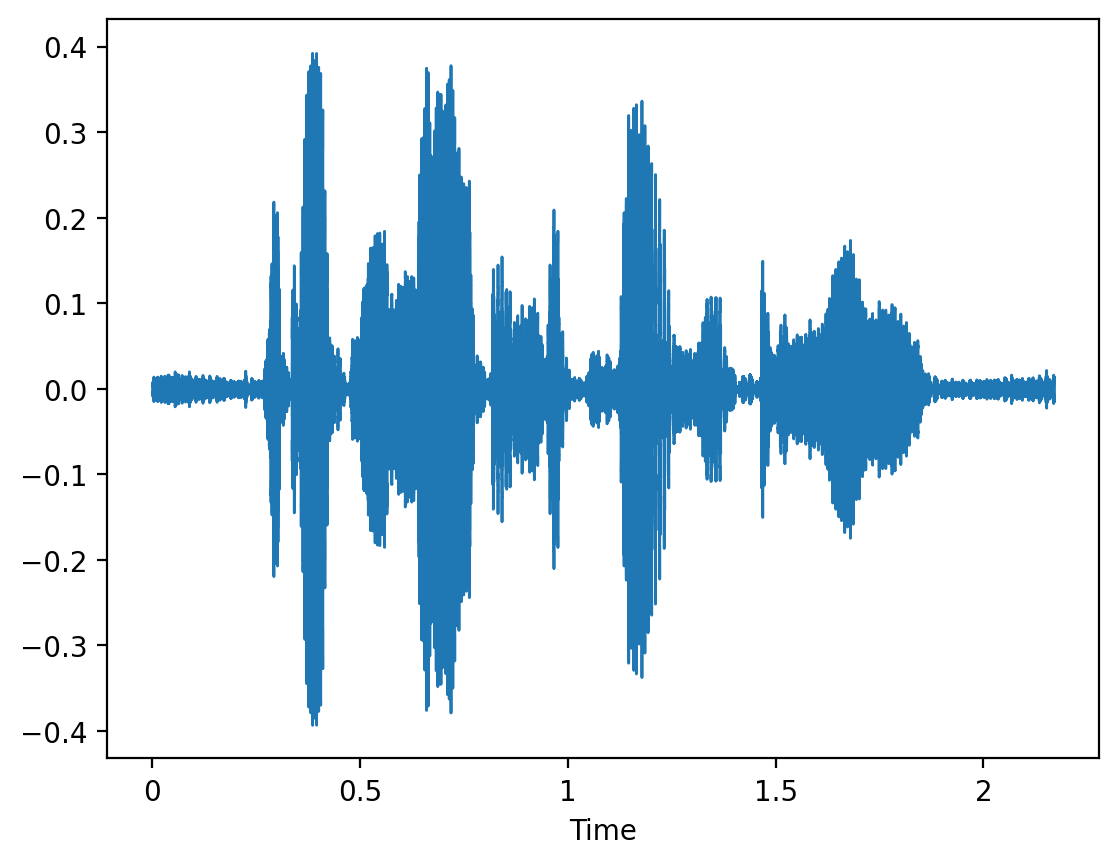

Reference text: IT WILL BE NO DISAPPOINTMENT TO ME
ASR hypothesis: IT WILL BE NO DISAPPOINTMENT TO ME
**************************************************


/usr/local/lib/python3.10/dist-packages/espnet/nets/ctc_prefix_score.py:323: RuntimeWarning: invalid value encountered in logaddexp
  r_sum = self.xp.logaddexp(
/usr/local/lib/python3.10/dist-packages/espnet/nets/ctc_prefix_score.py:323: RuntimeWarning: invalid value encountered in logaddexp
  r_sum = self.xp.logaddexp(
/usr/local/lib/python3.10/dist-packages/espnet/nets/ctc_prefix_score.py:323: RuntimeWarning: invalid value encountered in logaddexp
  r_sum = self.xp.logaddexp(


Input Speech: ESPNet_asr_egs/en/3.wav


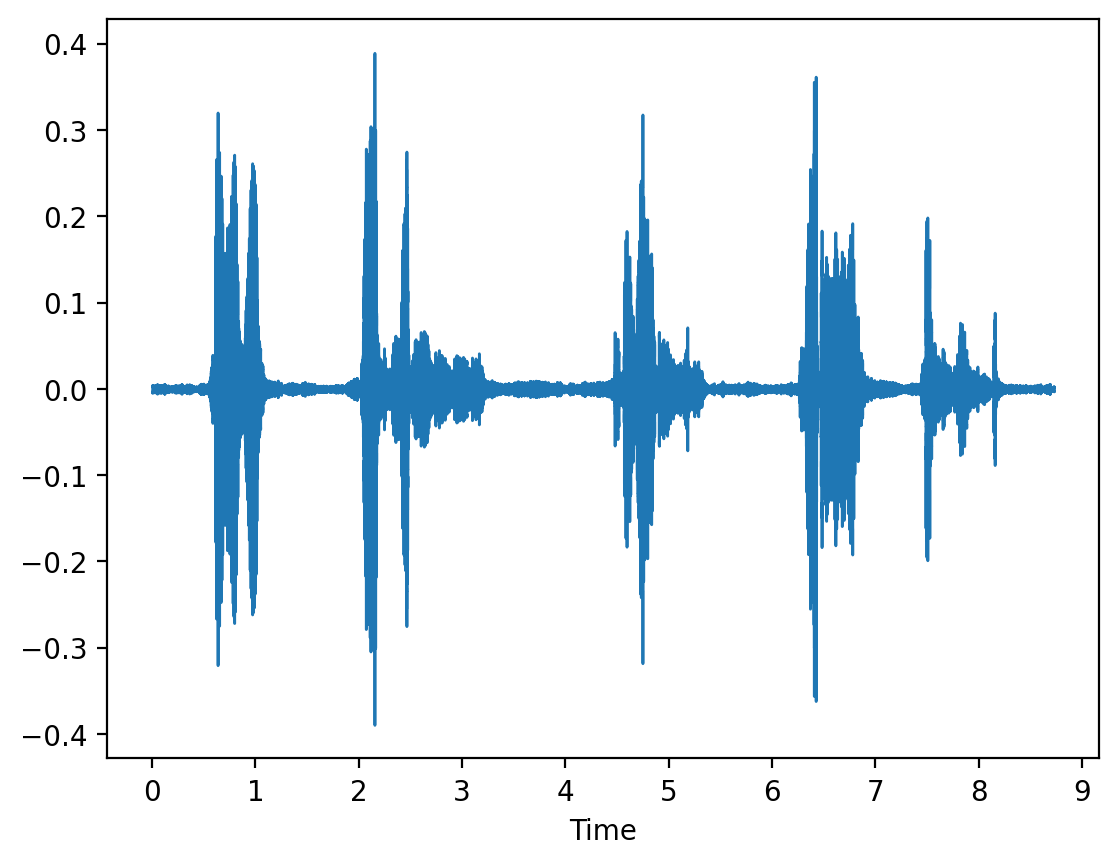

Reference text: HOWEVER THAT WAS OVER NOW THE TREE GONE THE STORY AT AN END
ASR hypothesis: HOWEVER THAT WAS OVER NOW THE TREE ON THE STORY HAD AN END
**************************************************
Input Speech: ESPNet_asr_egs/en/4.wav


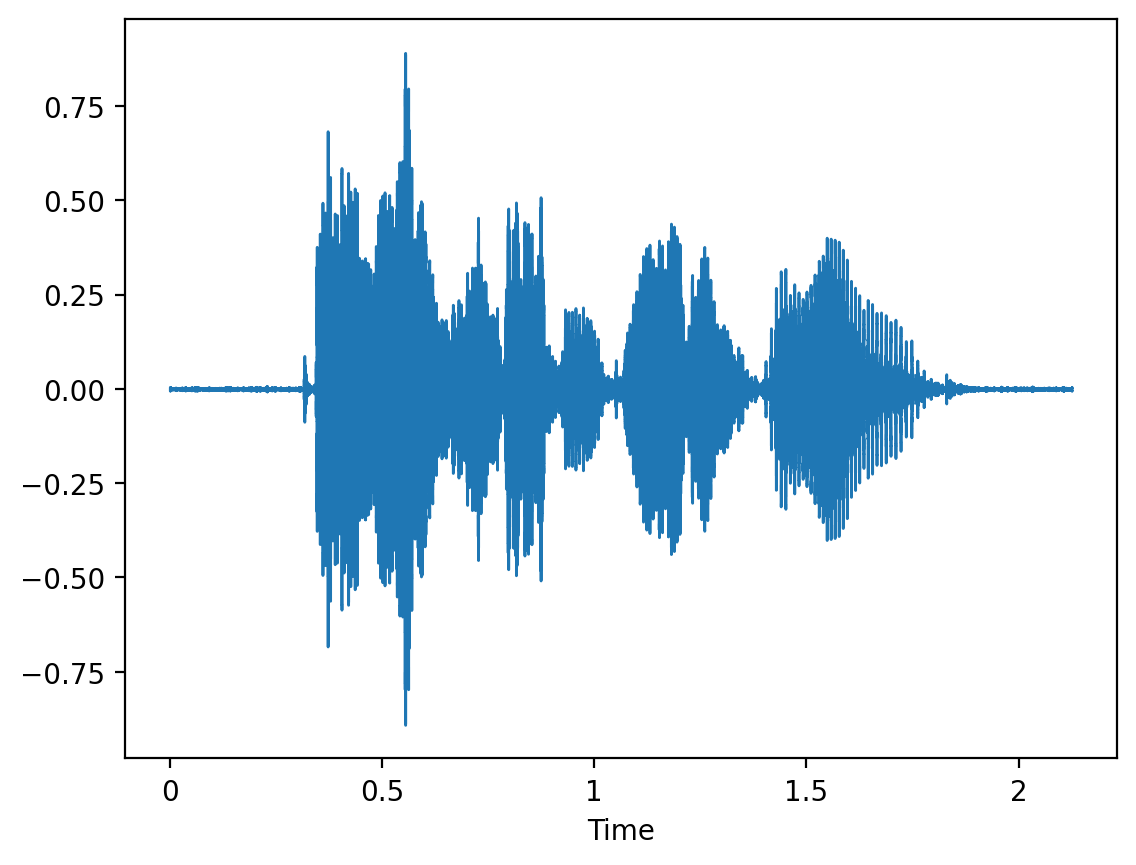

Reference text: ALL IS SAID WITHOUT A WORD
ASR hypothesis: ALL IS SAID WITHOUT A WORD
**************************************************


/usr/local/lib/python3.10/dist-packages/espnet/nets/ctc_prefix_score.py:323: RuntimeWarning: invalid value encountered in logaddexp
  r_sum = self.xp.logaddexp(


Input Speech: ESPNet_asr_egs/en/5.wav


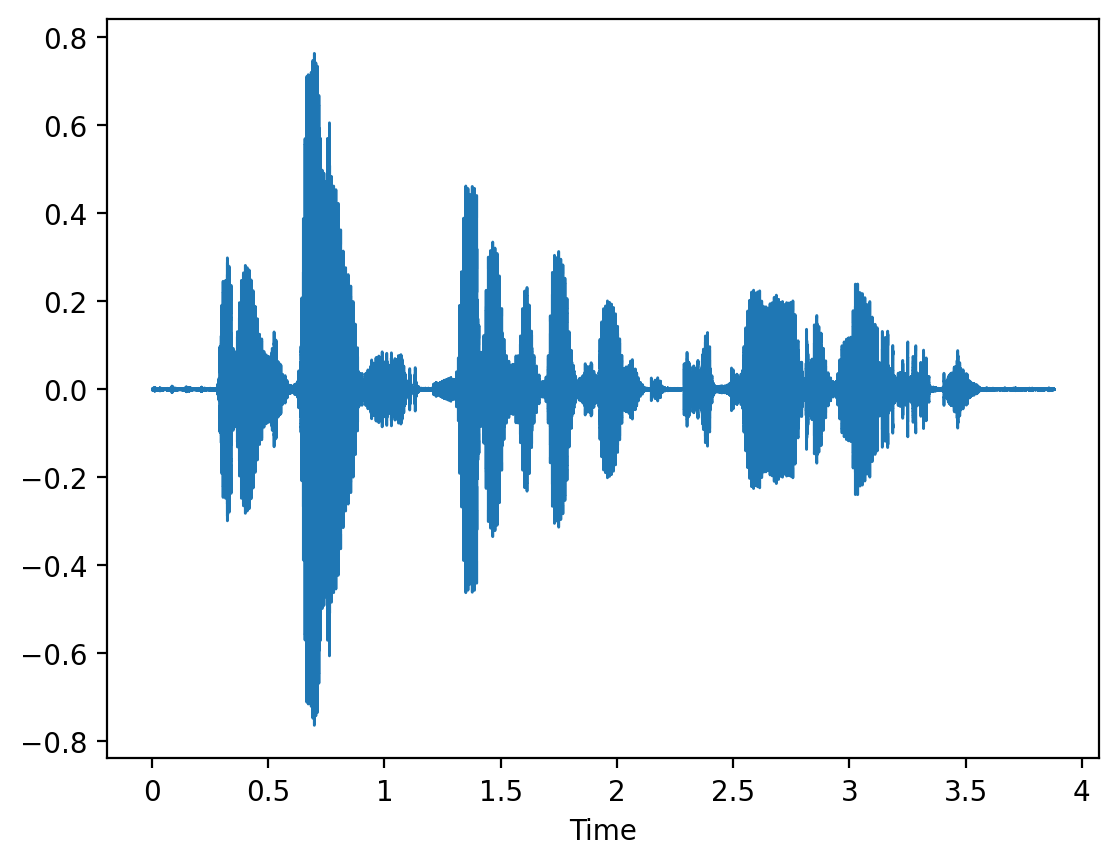

Reference text: IT IS THIS THAT IS OF INTEREST TO THEORY OF KNOWLEDGE
ASR hypothesis: IT IS THIS THAT IS OF INTEREST TO THEORY OF KNOWLEDGE
**************************************************


In [5]:
!git clone https://github.com/ftshijt/ESPNet_asr_egs.git

import pandas as pd
import soundfile
import librosa.display
from IPython.display import display, Audio
import matplotlib.pyplot as plt


egs = pd.read_csv("ESPNet_asr_egs/egs.csv")
for index, row in egs.iterrows():
  if row["lang"] == lang or lang == "multilingual":
    speech, rate = soundfile.read("ESPNet_asr_egs/" + row["path"])
    assert fs == int(row["sr"])
    nbests = speech2text(speech)

    text, *_ = nbests[0]
    print(f"Input Speech: ESPNet_asr_egs/{row['path']}")
    # let us listen to samples
    display(Audio(speech, rate=rate))
    librosa.display.waveshow(speech, sr=rate)
    plt.show()
    print(f"Reference text: {text_normalizer(row['text'])}")
    print(f"ASR hypothesis: {text_normalizer(text)}")
    print("*" * 50)


### Recognize your own pre-recordings

1.   Upload your own pre-recorded recordings
2.   Recognize your voice with the ASR system

Saving test_audio_ds.wav to test_audio_ds (2).wav


/usr/local/lib/python3.10/dist-packages/espnet/nets/ctc_prefix_score.py:323: RuntimeWarning: invalid value encountered in logaddexp
  r_sum = self.xp.logaddexp(
/usr/local/lib/python3.10/dist-packages/espnet/nets/ctc_prefix_score.py:323: RuntimeWarning: invalid value encountered in logaddexp
  r_sum = self.xp.logaddexp(
/usr/local/lib/python3.10/dist-packages/espnet/nets/ctc_prefix_score.py:323: RuntimeWarning: invalid value encountered in logaddexp
  r_sum = self.xp.logaddexp(
/usr/local/lib/python3.10/dist-packages/espnet/nets/ctc_prefix_score.py:323: RuntimeWarning: invalid value encountered in logaddexp
  r_sum = self.xp.logaddexp(
/usr/local/lib/python3.10/dist-packages/espnet/nets/ctc_prefix_score.py:323: RuntimeWarning: invalid value encountered in logaddexp
  r_sum = self.xp.logaddexp(


Input Speech: test_audio_ds (2).wav


/usr/local/lib/python3.10/dist-packages/espnet/nets/ctc_prefix_score.py:323: RuntimeWarning: invalid value encountered in logaddexp
  r_sum = self.xp.logaddexp(


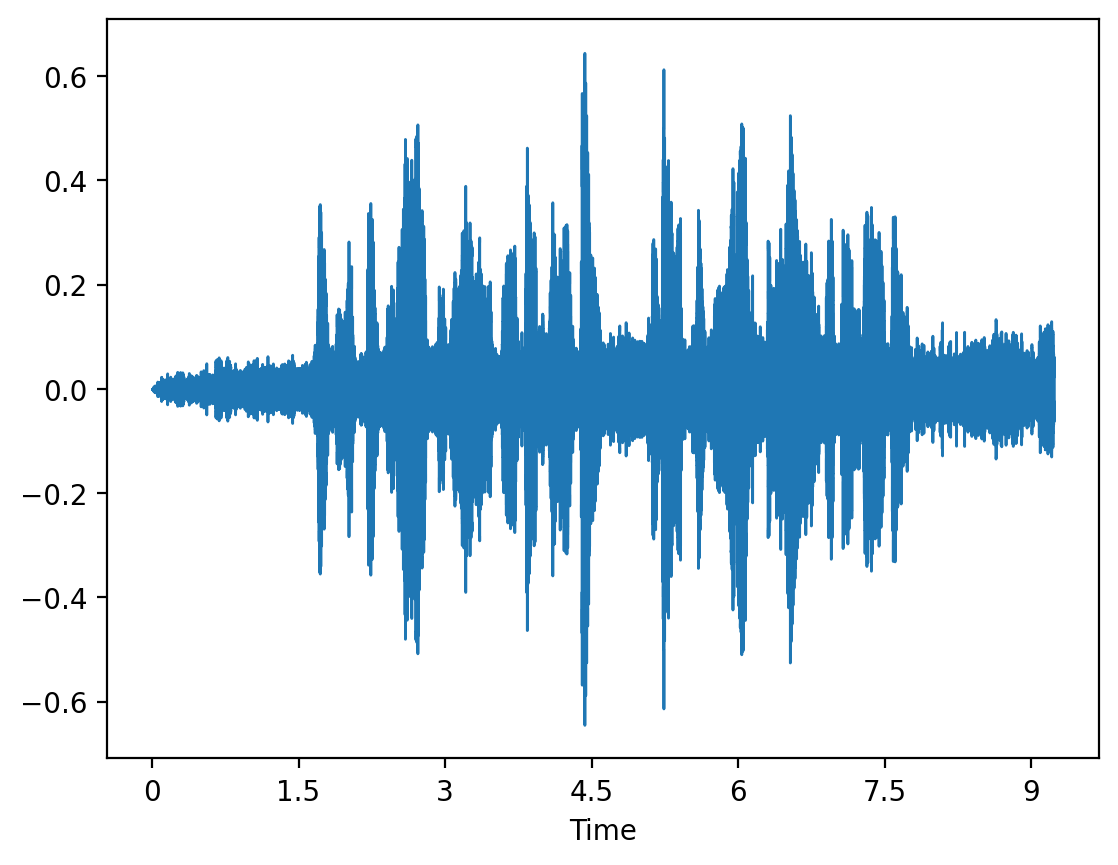

Reference text: THIS IS THE TESTING AUDIO FOR ELEC5305. THIS IS THE TESTING AUDIO FOR ELEC5305
ASR hypothesis: THIS IS A TESTING AUDIO FOR ELEC 5305 THIS IS A TESTING AUDIO FOR ELEC BY 35 AND
**************************************************


In [9]:
from google.colab import files
from IPython.display import display, Audio
import soundfile
import librosa.display
import matplotlib.pyplot as plt

uploaded = files.upload()

for file_name in uploaded.keys():
  speech, rate = soundfile.read(file_name)
  assert rate == fs, "mismatch in sampling rate"
  nbests = speech2text(speech)
  text, *_ = nbests[0]

  print(f"Input Speech: {file_name}")
  display(Audio(speech, rate=rate))
  librosa.display.waveshow(speech, sr=rate)
  plt.show()
  print("Reference text: THIS IS THE TESTING AUDIO FOR ELEC5305. THIS IS THE TESTING AUDIO FOR ELEC5305")
  print(f"ASR hypothesis: {text_normalizer(text)}")
  print("*" * 50)

### Recognize your own live-recordings



1.   Record your own voice
2.   Recognize your voice with the ASR system



Speak to your microphone 5 sec...


<IPython.core.display.Javascript object>

Done!


/usr/local/lib/python3.10/dist-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


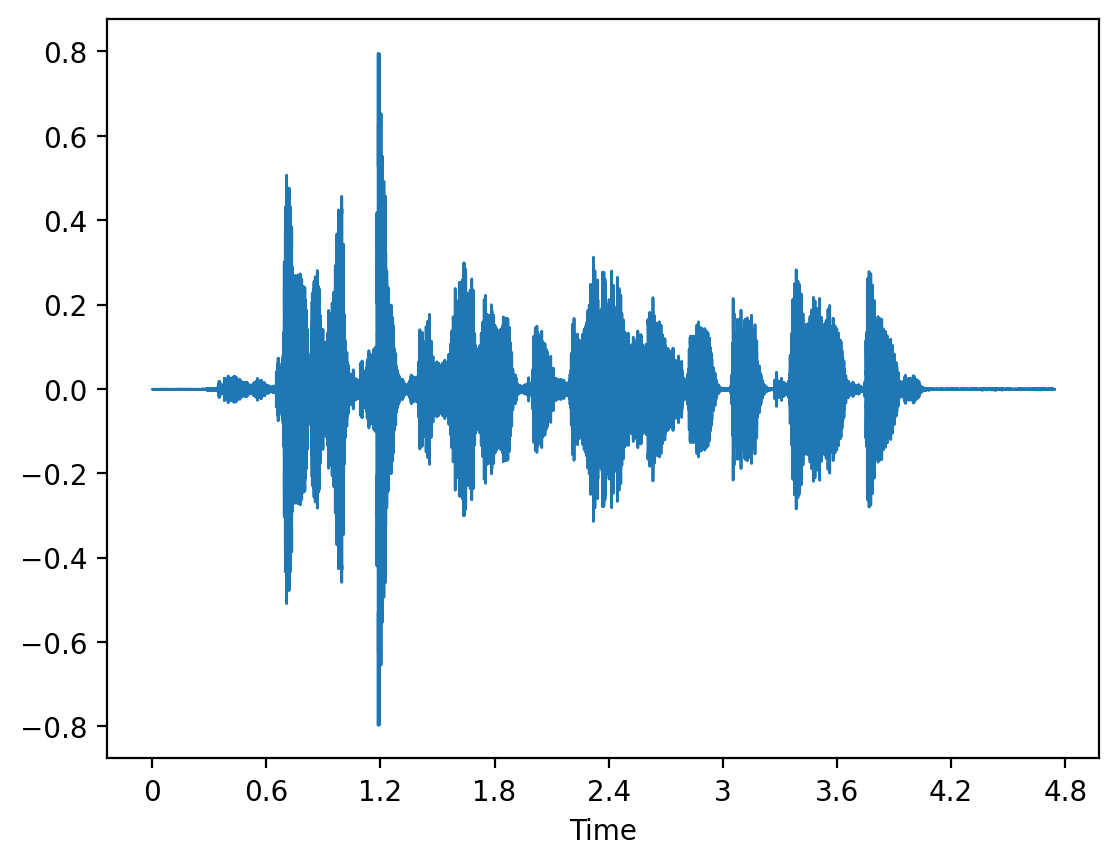

ModuleNotFoundError: ignored

In [13]:
# from https://gist.github.com/korakot/c21c3476c024ad6d56d5f48b0bca92be

from IPython.display import Javascript
from google.colab import output
from base64 import b64decode

RECORD = """
const sleep = time => new Promise(resolve => setTimeout(resolve, time))
const b2text = blob => new Promise(resolve => {
  const reader = new FileReader()
  reader.onloadend = e => resolve(e.srcElement.result)
  reader.readAsDataURL(blob)
})
var record = time => new Promise(async resolve => {
  stream = await navigator.mediaDevices.getUserMedia({ audio: true })
  recorder = new MediaRecorder(stream)
  chunks = []
  recorder.ondataavailable = e => chunks.push(e.data)
  recorder.start()
  await sleep(time)
  recorder.onstop = async ()=>{
    blob = new Blob(chunks)
    text = await b2text(blob)
    resolve(text)
  }
  recorder.stop()
})
"""

def record(sec, filename='audio.wav'):
  display(Javascript(RECORD))
  s = output.eval_js('record(%d)' % (sec * 1000))
  b = b64decode(s.split(',')[1])
  with open(filename, 'wb+') as f:
    f.write(b)

audio = 'audio.wav'
second = 5
print(f"Speak to your microphone {second} sec...")
record(second, audio)
print("Done!")


import librosa
import librosa.display
speech, rate = librosa.load(audio, sr=16000)
librosa.display.waveshow(speech, sr=rate)

import matplotlib.pyplot as plt
plt.show()

import pysndfile
pysndfile.sndio.write('audio_ds.wav', speech, rate=rate, format='wav', enc='pcm16')

from IPython.display import display, Audio
display(Audio(speech, rate=rate))

In [14]:
nbests = speech2text(speech)
text, *_ = nbests[0]

print(f"ASR hypothesis: {text_normalizer(text)}")

/usr/local/lib/python3.10/dist-packages/espnet/nets/ctc_prefix_score.py:323: RuntimeWarning: invalid value encountered in logaddexp
  r_sum = self.xp.logaddexp(


ASR hypothesis: THIS IS A TESTING AUDIO FOR ELEC 5305 THE
